In [ ]:
TRAIN_PATH = "drive/MyDrive/CovidDataset/Train"
VAL_PATH = "drive/MyDrive/CovidDataset/Test"

In [ ]:
import numpy as np     #numpy
import matplotlib.pyplot as plt    #matplotlib for plots
import keras     #keras for cnn
from keras.layers import *    #importing keras layers (Sequential)
from keras.models import *    #importing keras models (Activation etc.)
from keras.preprocessing import image    #to process image 
from keras import losses    #importing losses

In [ ]:
#CNN based model in keras
#Sequential model with multiple filters
#3 or 4 CNN Layes followed by classification layers
#model.add(Conv2D(no. of filters, kernel size=()))
#32 layers initially, kernel size 3,3 is standard choice
#relu is rectified linear unit which maintains linearity and is an activation function
#it computes max(0,x) for every element x in a matrix
#maxpool is a pooling layer which reduces the dimensionality of the image by removing the 
#unwanted part/pixels
#poolsize is the max window whic shifted and traverses through the image
#dropout prevents over fitting by setting imput units to 0
#the parameter 0.25 is the fraction of input units to drop
#flattens the data to 1D array to send it as input to the next layer

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
#entry level layer 64 here is number of neurons
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#after defining the layers and the model we have to configure the process
#by adding the compile() method
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
#binary_crossentropy loss will calculate the cross entropy loss between predicted and real results
#cross entropy is the loss or measure of performance of a classification model whose
#output is 0 or 1
#optimizer is a class/method to change the attributes of model to enhance the learning rate
#and reduce losses
#metrics is used to judge the performance of the model
#accuracy metric is used to evaluate classification model






In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [ ]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:

#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'drive/MyDrive/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 312 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
hist_new=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 130s 16s/step - loss: 0.8488 - accuracy: 0.5172 - val_loss: 0.6717 - val_accuracy: 0.4531
Epoch 2/10
8/8 [==============================] - 76s 9s/step - loss: 0.6074 - accuracy: 0.6668 - val_loss: 0.5336 - val_accuracy: 0.7656
Epoch 3/10
8/8 [==============================] - 73s 9s/step - loss: 0.4882 - accuracy: 0.7525 - val_loss: 0.2462 - val_accuracy: 0.9531
Epoch 4/10
8/8 [==============================] - 73s 9s/step - loss: 0.3204 - accuracy: 0.8701 - val_loss: 0.1641 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 74s 9s/step - loss: 0.2061 - accuracy: 0.9512 - val_loss: 0.1366 - val_accuracy: 0.9688
Epoch 6/10
8/8 [==============================] - 73s 9s/step - loss: 0.2269 - accuracy: 0.8855 - val_loss: 0.1311 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 74s 9s/step - loss: 0.1618 - accuracy: 0.9614 - val_loss: 0.0742 - val_accuracy: 0.9844
Epoch 8/10
8/8 [================

In [ ]:

model.save_weights("model.h5")

In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1295805424451828, 0.9455128312110901]

In [ ]:
print(model.evaluate_generator(validation_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.06988310813903809, 0.987500011920929]


In [ ]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual, y_test = [],[]

In [ ]:
img=image.load_img("pos.jpeg",target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img,axis=0)
pred=model.predict_classes(img)
print(pred)

[[0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir("drive/MyDrive/CovidDataset/Val/Normal/"):
    img=image.load_img("drive/MyDrive/CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

NameError: ignored

In [ ]:
for i in os.listdir("drive/MyDrive/CovidDataset/Val/Covid/"):
    img=image.load_img("drive/MyDrive/CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

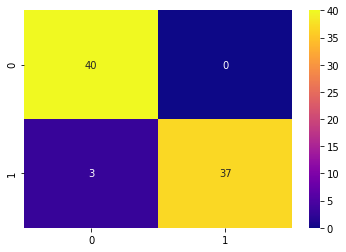

In [ ]:
sns.heatmap(cn,cmap="plasma",annot=True)

In [ ]:
from google.colab import files
